# Ishaan Solanki

## Research question/interests

**My interest in finding out who are the top 4 best batsmen in the IPL ever. In order to achieve this, I will analyze their performance  across their entire careers, taking into account the statistics provided by our data sources for both regular season and playoffs, giving more importance in the latter.**

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
import pandas as pd
ball_by_ball = pd.read_csv("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [80]:
import pandas as pd
matches = pd.read_csv("../data/raw/IPL_Matches_2008_2022 (1).csv")
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


## EXPLORATORY DATA ANALYSIS 

In [81]:
batsman_group = ball_by_ball.groupby('batter')
matches = batsman_group['ID'].nunique()
total_runs = batsman_group['batsman_run'].sum()
total_balls_faced = batsman_group['ballnumber'].count()
Wickets = batsman_group['isWicketDelivery'].sum()
batsman_stats = pd.concat([matches,total_runs, total_balls_faced,Wickets], axis=1)
new_column_names = {'ID':'Matches','batsman_run': 'Total Runs', 
                    'ballnumber': 'Balls Faced'
                   , 'isWicketDelivery': 'Wickets'}
batsman_stats = batsman_stats.rename(columns=new_column_names)
description = batsman_stats.describe(include='all')
batsman_stats = batsman_stats[batsman_stats['Total Runs'] >= 1000]
batsman_stats['Strike Rate'] = batsman_stats['Total Runs'] / batsman_stats['Balls Faced'] * 100
batsman_stats['Runs scored per wicket']= batsman_stats['Total Runs'] / batsman_stats['Wickets'] 
batsman_stats = batsman_stats.sort_values('Runs scored per wicket',ascending=False)
batsman_stats.head(10)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
KL Rahul,99,3895,2933,84,132.799182,46.369048
AB de Villiers,170,5181,3487,125,148.580442,41.448000
JP Duminy,75,2029,1680,49,120.773810,41.408163
DA Warner,162,5883,4313,143,136.401577,41.139860
LMP Simmons,29,1079,878,27,122.892938,39.962963
JC Buttler,81,2832,1955,71,144.859335,39.887324
ML Hayden,32,1107,839,28,131.942789,39.535714
CH Gayle,141,4997,3516,128,142.121729,39.039062
SE Marsh,69,2489,1913,65,130.109775,38.292308


**We have a new data frame that gives us the aggregate statistics of Batsmen and will be used to perform analysis**

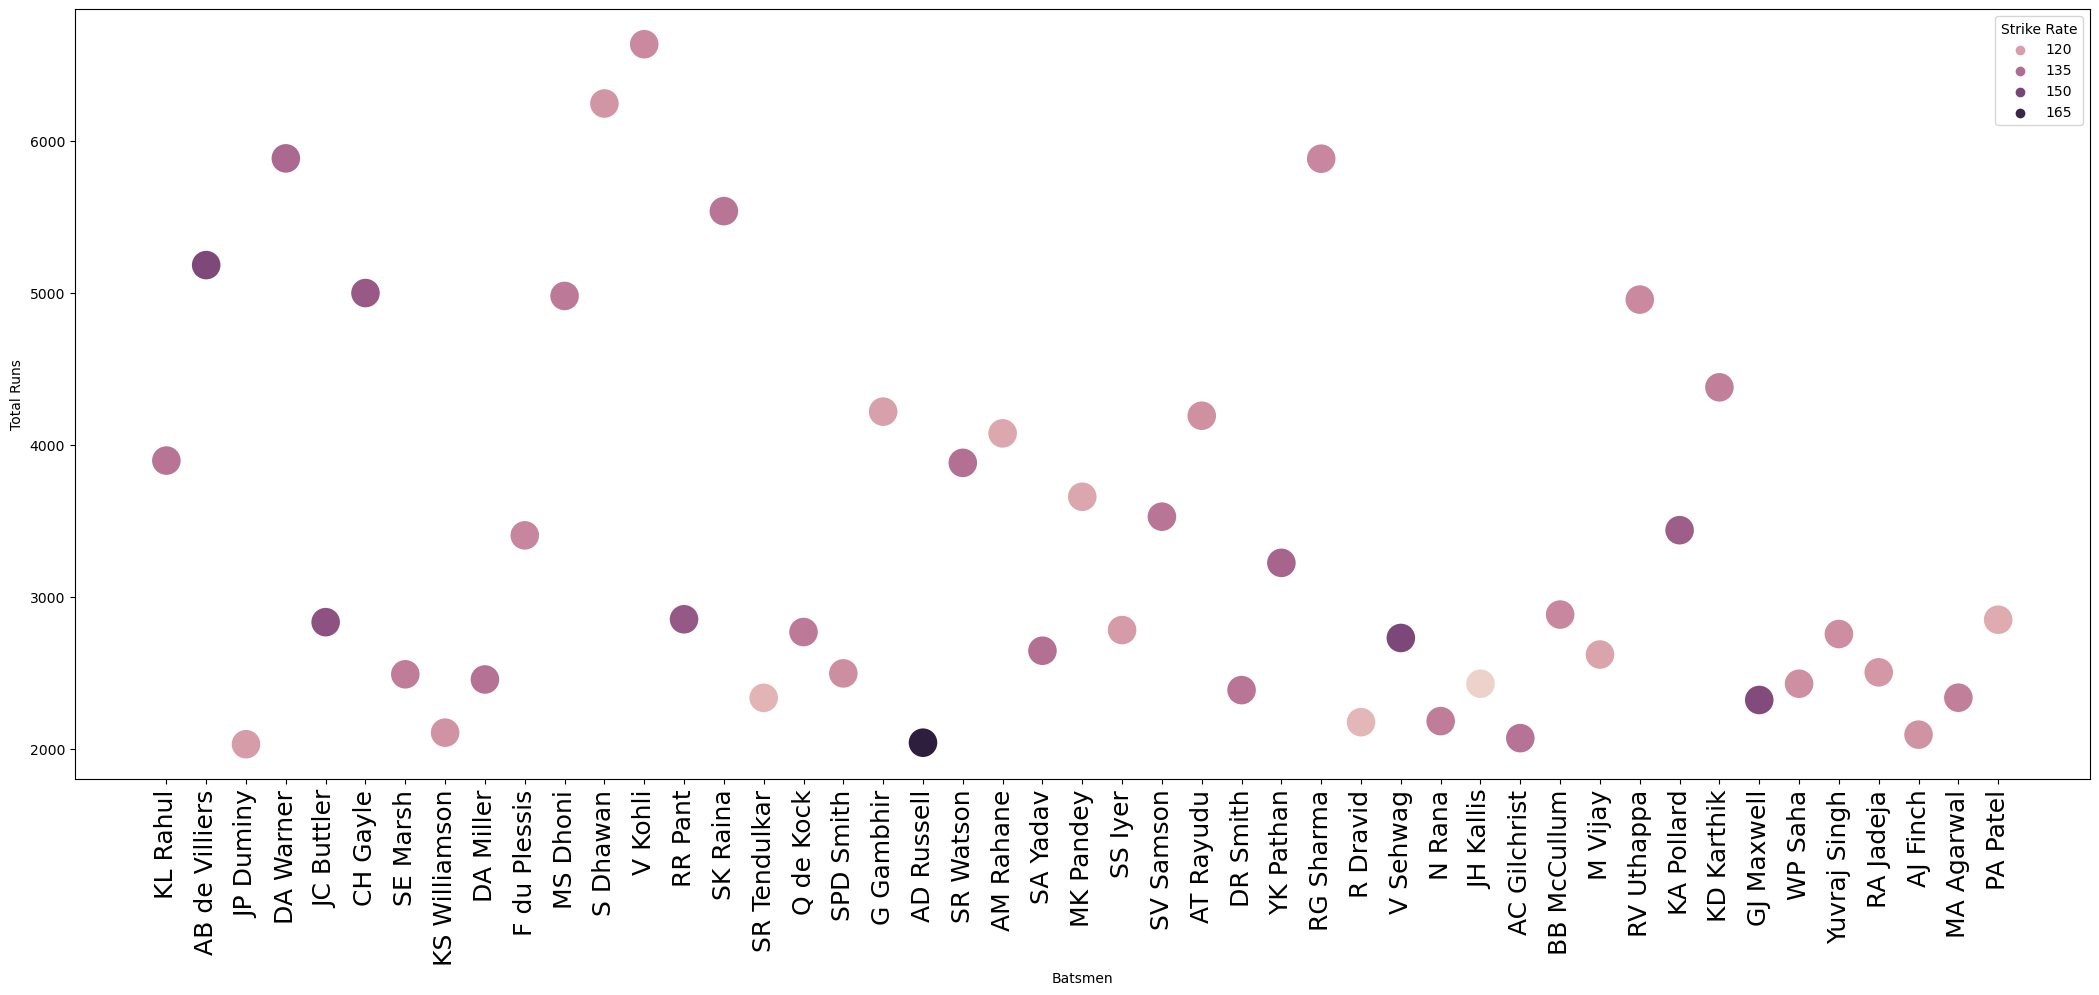

In [82]:
import seaborn as sns
filtered_data = batsman_stats[batsman_stats['Total Runs'] >= 2000]
sns.scatterplot(x=filtered_data.index, y=filtered_data['Total Runs'], hue=filtered_data['Strike Rate'], s=500)
fig = plt.gcf() 
fig.set_size_inches(26, 10)
plt.xticks(rotation=90, fontsize=18)
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.show()

**This shows us who has scored the most runs in ipl. Virat Kohli is top scorer of IPL. This should give us an idea of the batsmen that are in the top 4 all time discussion. Also it shows that ABD has a high strike rate despite scoring many runs.**

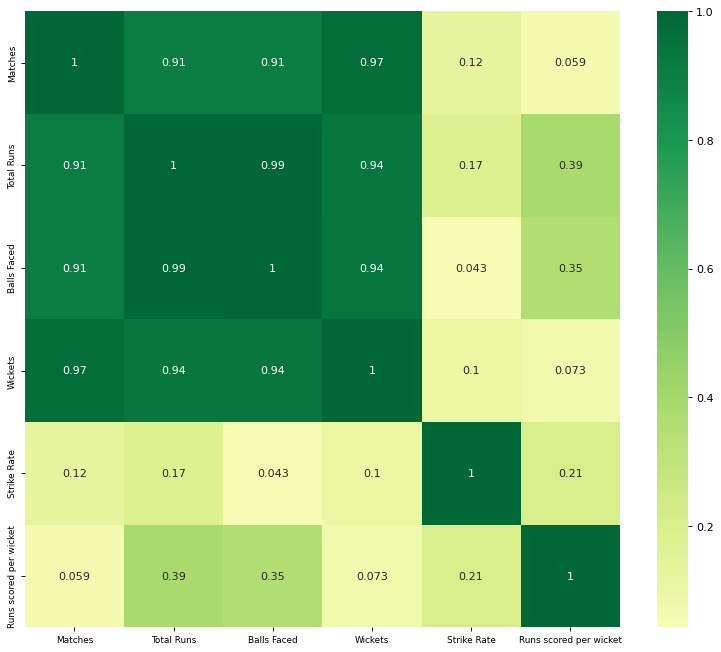

In [83]:
import seaborn as sns
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(batsman_stats.corr(), xticklabels=batsman_stats.corr().columns, yticklabels=batsman_stats.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**This gives us an overview of what variables are directly propotional to each other and which don't have any correlation. This will help us evaluate the data more precisely.**

In [84]:
df2 = ball_by_ball[ball_by_ball['innings'] >1]
batsman_group1 = df2.groupby('batter')
matches1 = batsman_group1['ID'].nunique()
total_runs1 = batsman_group1['batsman_run'].sum()
total_balls_faced1 = batsman_group1['ballnumber'].count()
Wickets1 = batsman_group1['isWicketDelivery'].sum()
batsman_stats1 = pd.concat([matches1,total_runs1, total_balls_faced1,Wickets1], axis=1)
new_column_names1 = {'ID':'Matches','batsman_run': 'Total Runs', 
                    'ballnumber': 'Balls Faced'
                   , 'isWicketDelivery': 'Wickets'}
batsman_stats1 = batsman_stats1.rename(columns=new_column_names1)
description1 = batsman_stats1.describe(include='all')
batsman_stats1 = batsman_stats1[batsman_stats1['Total Runs'] >= 1000]
batsman_stats1['Strike Rate'] = batsman_stats1['Total Runs'] / batsman_stats1['Balls Faced'] * 100
batsman_stats1['Runs scored per wicket']= batsman_stats1['Total Runs'] / batsman_stats1['Wickets'] 
batsman_stats1 = batsman_stats1.sort_values('Runs scored per wicket',ascending=False)
batsman_stats1.head(10)#this dataframe contains stats of batsmen performance while chasing

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
KL Rahul,45,1961,1461,40,134.223135,49.025000
DA Miller,50,1444,1060,32,136.226415,45.125000
Shubman Gill,34,1012,822,24,123.114355,42.166667
DA Warner,83,2841,2057,69,138.113758,41.173913
JC Buttler,43,1437,924,36,155.519481,39.916667
S Dhawan,88,2707,2200,68,123.045455,39.808824
CH Gayle,66,2124,1557,55,136.416185,38.618182
SE Marsh,29,1072,793,28,135.182850,38.285714
KS Williamson,39,1080,928,29,116.379310,37.241379


**This dataframe contains statistics of player perfomance while chasing.**

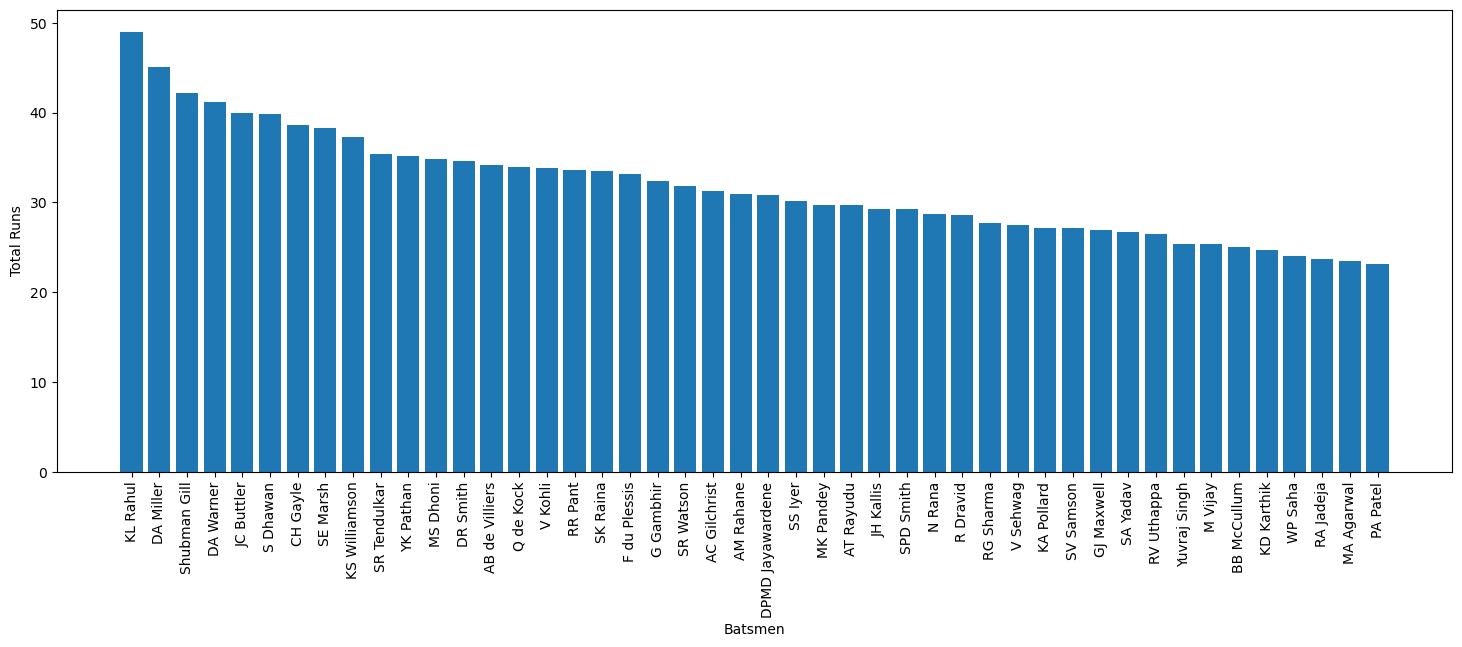

In [85]:
column_data = batsman_stats1['Runs scored per wicket']
plt.bar(column_data.index,column_data.values)
fig = plt.gcf() 
fig.set_size_inches(18, 6)
plt.xticks(rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.show()

**KL Rahul clearly is in a league of his own.**

## DATA ANALYSIS PIPELINE

#### LOAD DATA

In [86]:
from codes import project_function1 as pf1
matches = pf1.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")
ball_by_ball = pf1.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches
ball_by_ball
batsman_stats.info() #New df for stats specific to batsman
export_path = '../data/processed/Ishaan/batsman_stats.csv'
batsman_stats.to_csv(export_path, index=True)

batsman_stats1.info() #New df for stats specific to batsman while chasing
export_path = '../data/processed/Ishaan/batsman_stats1.csv'
batsman_stats1.to_csv(export_path, index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, KL Rahul to SP Narine
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Matches                 84 non-null     int64  
 1   Total Runs              84 non-null     int64  
 2   Balls Faced             84 non-null     int64  
 3   Wickets                 84 non-null     int64  
 4   Strike Rate             84 non-null     float64
 5   Runs scored per wicket  84 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 4.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, KL Rahul to PA Patel
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Matches                 46 non-null     int64  
 1   Total Runs              46 non-null     int64  
 2   Balls Faced             46 non-null     int64  
 3   Wickets                 46 non-nul

#### CLEAN DATA

In [87]:
print(matches.columns.tolist())
print(ball_by_ball.columns.tolist())

['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind', 'fielders_involved', 'BattingTeam']


In [88]:
new_matches = matches.drop(columns = ['City','Date','Venue','TossWinner','TossDecision', 'SuperOver','WonBy', 'Margin', 'method','Umpire1', 'Umpire2'])  

new_byb = ball_by_ball.drop(columns = ['non-striker','kind', 'fielders_involved'])     
new_matches

,ID,Season,MatchNumber,Team1,Team2,WinningTeam,Player_of_Match,Team1Players,Team2Players
0,1312200,2022,Final,Rajasthan Royals,Gujarat Titans,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
1,1312199,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
2,1312198,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda..."
3,1312197,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Gujarat Titans,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
4,1304116,2022,70,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',..."
...,...,...,...,...,...,...,...,...,...
945,335986,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma..."
946,335985,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '..."
947,335984,2007/08,3,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'..."
948,335983,2007/08,2,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh..."


In [89]:
new_byb

,ID,innings,overs,ballnumber,batter,bowler,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,NaN,0,0,0,0,0,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,legbyes,0,1,1,0,0,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,NaN,1,0,1,0,0,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,NaN,0,0,0,0,0,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,NaN,0,0,0,0,0,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,legbyes,0,1,1,0,0,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,NaN,1,0,1,0,0,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,NaN,0,0,0,0,0,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,wides,0,1,1,0,0,NaN,Royal Challengers Bangalore


In [90]:
new_byb.describe(include = 'all')


,ID,innings,overs,ballnumber,batter,bowler,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,BattingTeam
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954,225954,12049,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000,11151,225954
unique,NaN,NaN,NaN,NaN,605,472,5,NaN,NaN,NaN,NaN,NaN,573,18
top,NaN,NaN,NaN,NaN,V Kohli,R Ashwin,wides,NaN,NaN,NaN,NaN,NaN,RG Sharma,Mumbai Indians
freq,NaN,NaN,NaN,NaN,5266,4024,7025,NaN,NaN,NaN,NaN,NaN,194,27826
mean,8.320470e+05,1.483868,9.185679,3.619750,NaN,NaN,NaN,1.243523,0.066907,1.31043,0.000093,0.049351,NaN,NaN
std,3.379542e+05,0.503104,5.681797,1.810633,NaN,NaN,NaN,1.618166,0.341470,1.60605,0.009640,0.216600,NaN,NaN
min,3.359820e+05,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN
25%,5.012620e+05,1.000000,4.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN
50%,8.297370e+05,1.000000,9.000000,4.000000,NaN,NaN,NaN,1.000000,0.000000,1.00000,0.000000,0.000000,NaN,NaN
75%,1.178395e+06,2.000000,14.000000,5.000000,NaN,NaN,NaN,1.000000,0.000000,1.00000,0.000000,0.000000,NaN,NaN


#### PROCESS AND WRANGLE DATA

Firstly, we are going to create a new data frame that record stats of batsmen in playoffs.

In [91]:
new_matches = new_matches[(new_matches['MatchNumber'] == 'Final') | (new_matches['MatchNumber'] == 'Eliminator') | (new_matches['MatchNumber'] == 'Qualifier 1') | (new_matches['MatchNumber'] == 'Qualifier 2')]
id_list = new_matches['ID'].tolist()
new_byb = new_byb[new_byb['ID'].isin(id_list)]
df3 = new_byb
batsman_group2 = df3.groupby('batter')
batsman_stats2 = pf1.get_batsman_stats(batsman_group2)
batsman_stats2 = batsman_stats2[batsman_stats2['Total Runs'] >= 75]
batsman_stats2['Strike Rate'] = batsman_stats2['Total Runs'] / batsman_stats2['Balls Faced'] * 100
batsman_stats2['Runs scored per wicket']= batsman_stats2['Total Runs'] / batsman_stats2['Wickets'] 
batsman_stats2 = batsman_stats2.sort_values('Runs scored per wicket',ascending=False)
export_path = '../data/processed/Ishaan/batsman_stats2.csv'
batsman_stats2.to_csv(export_path, index=True)
batsman_stats2 #this dataframe contains stats of batsmen performance in playoffs

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
RM Patidar,2,170,102,1,166.666667,170.000000
DA Miller,5,147,90,1,163.333333,147.000000
JC Buttler,3,234,155,2,150.967742,117.000000
Ishan Kishan,3,111,77,1,144.155844,111.000000
MS Bisla,1,89,52,1,171.153846,89.000000
KS Williamson,5,216,184,4,117.391304,54.000000
YK Pathan,7,198,133,4,148.872180,49.500000
DPMD Jayawardene,2,95,76,2,125.000000,47.500000
Shubman Gill,6,234,194,5,120.618557,46.800000


#### DATA ANALYSIS

Now we need to make a weighted score formula that assesses the data appropriately 

Weighted_Score = (Total Runs - Balls Faced)/Wickets * (Matches)^(1/3) * (Total Runs)^(1/3)

We will have 3 types of Weigthed_Score (Overall, Playoffs and while Chasing), I believe Overall= 70%, Playoffs= 20%, Chasing= 10% should be appropriate way of assessing the Batsmen.


In [92]:
batsman_stats['Weighted Score'] = 0.7*pf1.calculate_batsman_score(batsman_stats) 
batsman_stats = batsman_stats.sort_values('Weighted Score', ascending=False)
batsman_stats.head(25)


,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket,Weighted Score
batter,,,,,,,
AB de Villiers,170,5181,3487,125,148.580442,41.448000,92.876
CH Gayle,141,4997,3516,128,142.121729,39.039062,76.398
DA Warner,162,5883,4313,143,136.401577,41.139860,76.237
KL Rahul,99,3895,2933,84,132.799182,46.369048,68.397
JC Buttler,81,2832,1955,71,144.859335,39.887324,67.648
AD Russell,81,2039,1212,66,168.234323,30.893939,64.967
MS Dhoni,205,4978,3802,142,130.931089,35.056338,58.170
SK Raina,200,5536,4177,168,132.535312,32.952381,57.596
RR Pant,97,2851,2000,85,142.550000,33.541176,56.567


In [93]:
batsman_stats1['Weighted Score'] = 0.1*pf1.calculate_batsman_score(batsman_stats1)
batsman_stats1 = batsman_stats1.sort_values('Weighted Score', ascending=False)
batsman_stats1.head(25)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket,Weighted Score
batter,,,,,,,
JC Buttler,43,1437,924,36,155.519481,39.916667,8.960
DA Warner,83,2841,2057,69,138.113758,41.173913,8.931
KL Rahul,45,1961,1461,40,134.223135,49.025000,8.340
YK Pathan,81,1897,1297,54,146.260601,35.129630,8.132
DA Miller,50,1444,1060,32,136.226415,45.125000,7.744
CH Gayle,66,2124,1557,55,136.416185,38.618182,7.430
AB de Villiers,83,2018,1490,59,135.436242,34.203390,6.644
V Sehwag,55,1427,906,52,157.505519,27.442308,6.556
SR Watson,80,2168,1576,68,137.563452,31.882353,6.501


In [94]:
batsman_stats2['Weighted Score'] = 0.2 *pf1.calculate_batsman_score(batsman_stats2)
batsman_stats2 = batsman_stats2.sort_values('Weighted Score', ascending=False)
batsman_stats2.head(25)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket,Weighted Score
batter,,,,,,,
RM Patidar,2,170,102,1,166.666667,170.000000,35.930
DA Miller,5,147,90,1,163.333333,147.000000,34.246
JC Buttler,3,234,155,2,150.967742,117.000000,23.552
Ishan Kishan,3,111,77,1,144.155844,111.000000,17.902
MS Bisla,1,89,52,1,171.153846,89.000000,15.636
SK Raina,17,599,381,13,157.217848,46.076923,15.614
M Vijay,7,322,211,7,152.606635,46.000000,11.484
YK Pathan,7,198,133,4,148.872180,49.500000,10.852
AB de Villiers,9,268,188,6,142.553191,44.666667,9.766


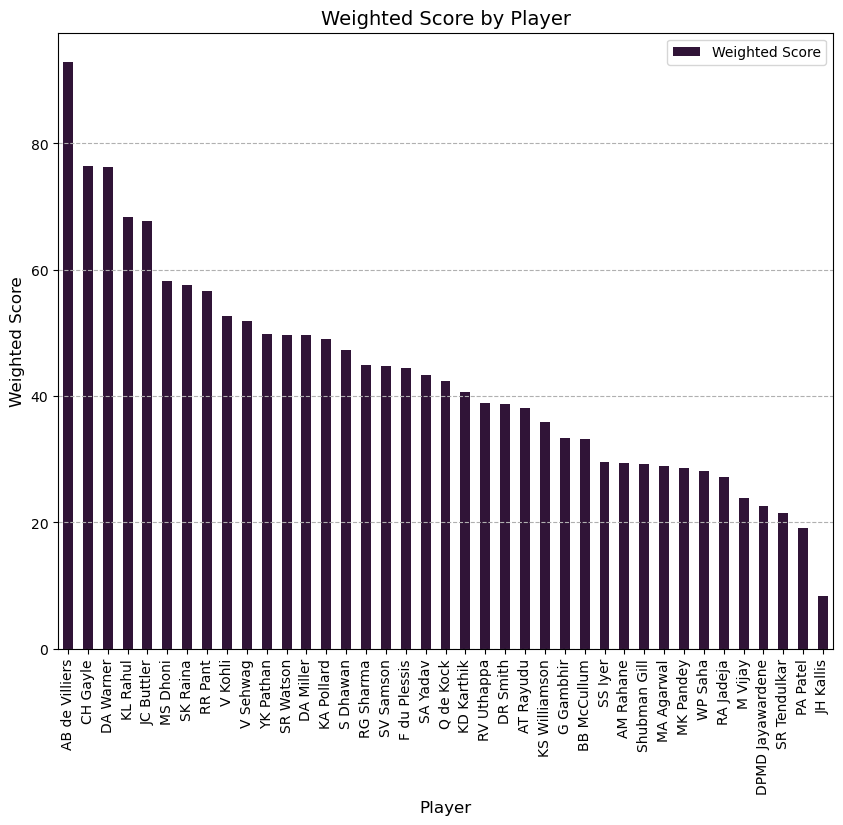

In [95]:
merged_df = pd.merge(batsman_stats1, batsman_stats2, left_index=True, right_index=True).merge(batsman_stats, left_index=True, right_index=True)
merged_df = merged_df.sort_values('Weighted Score', ascending=False)
merged_df = merged_df[['Weighted Score']]
export_path = '../data/processed/Ishaan/merged_df.csv'
merged_df.to_csv(export_path, index=True)
ax = merged_df.plot.bar(figsize=(10, 8), colormap='twilight_shifted')
ax.set_xlabel('Player', fontsize=12)
ax.set_ylabel('Weighted Score', fontsize=12)
ax.set_title('Weighted Score by Player', fontsize=14)
ax.grid(True, axis='y', linestyle='--')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()



I can conclude that according to my analysis, AB de Villiers,Chris Gayle, David Warner and KL Rahul are the top 4 best batsmen in the history of IPL. They have been consistent performers over multiple seasons and have helped their respective teams win matches with their impressive batting skills.

